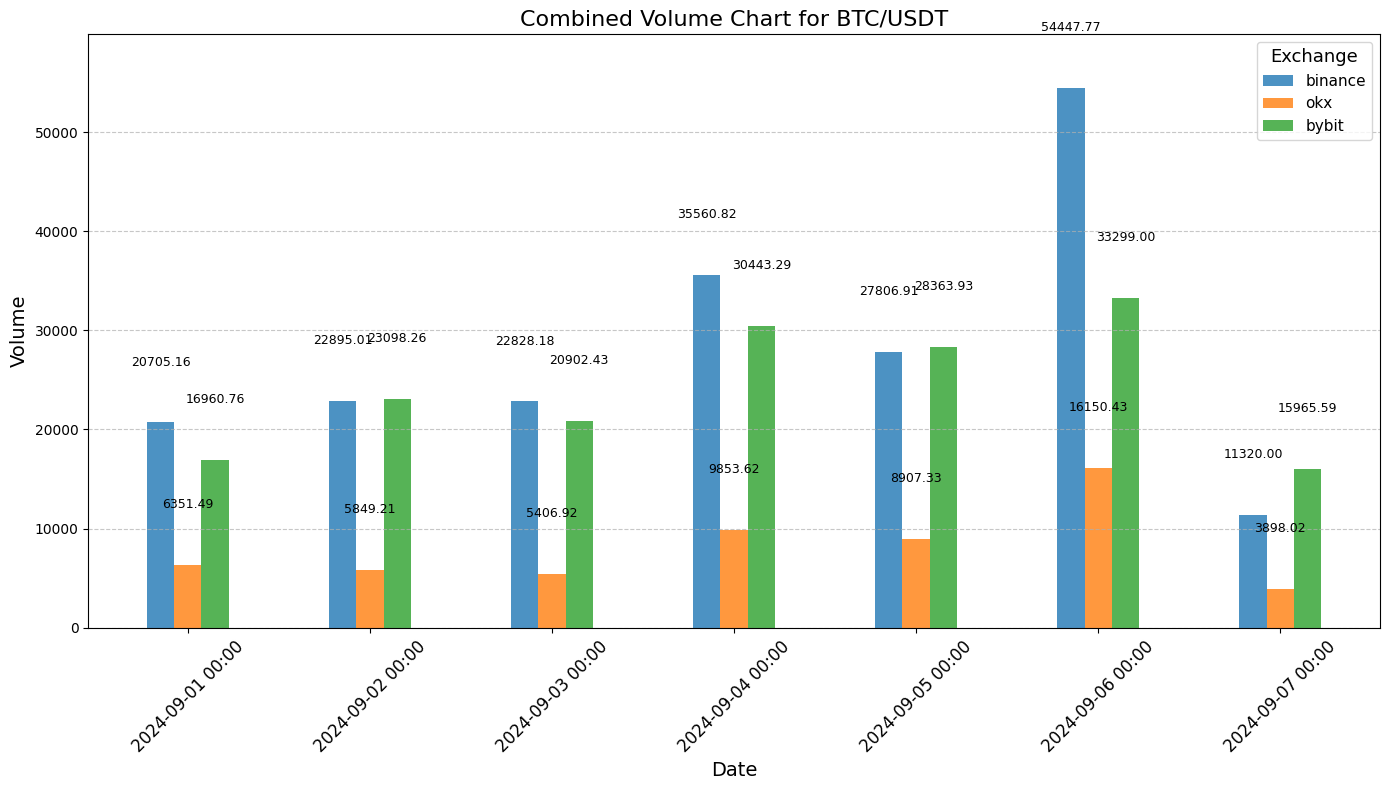

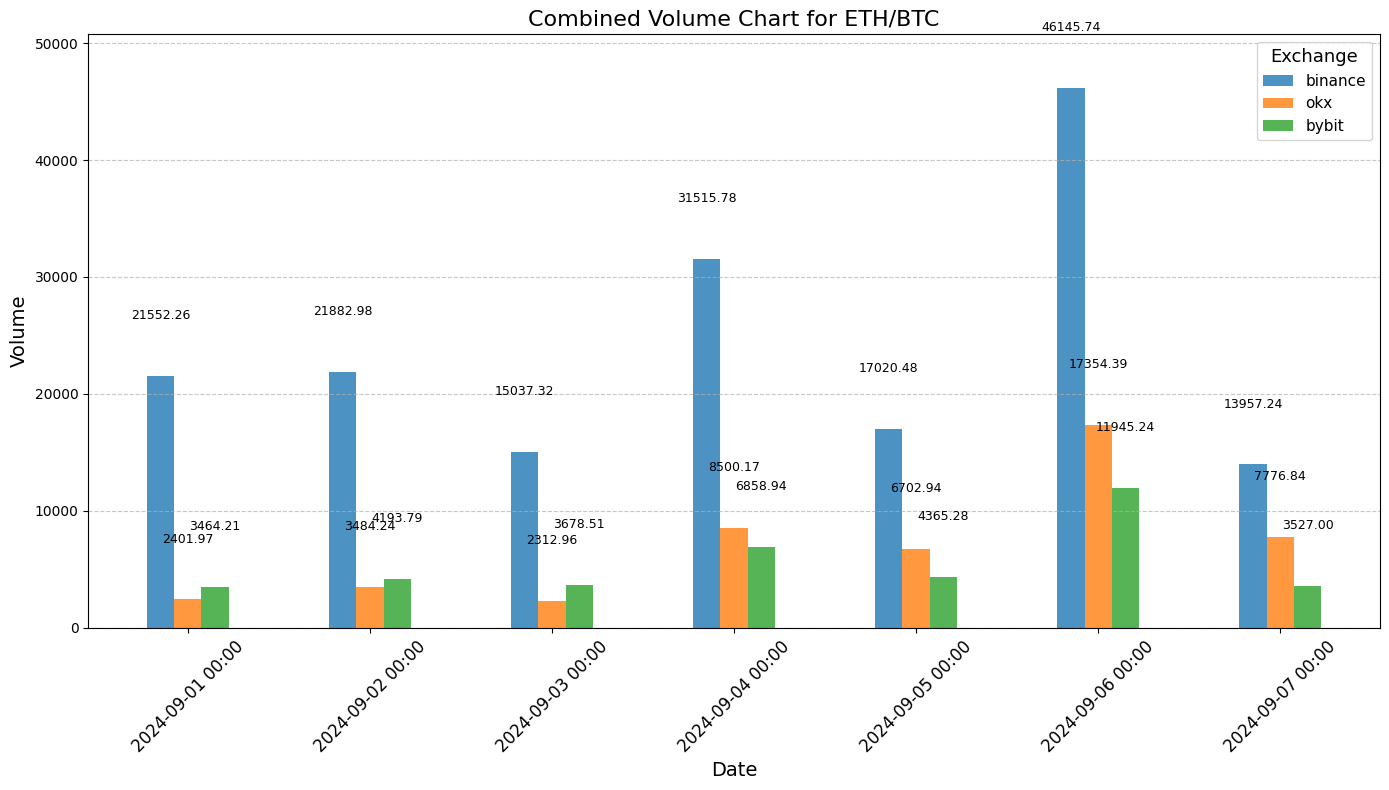

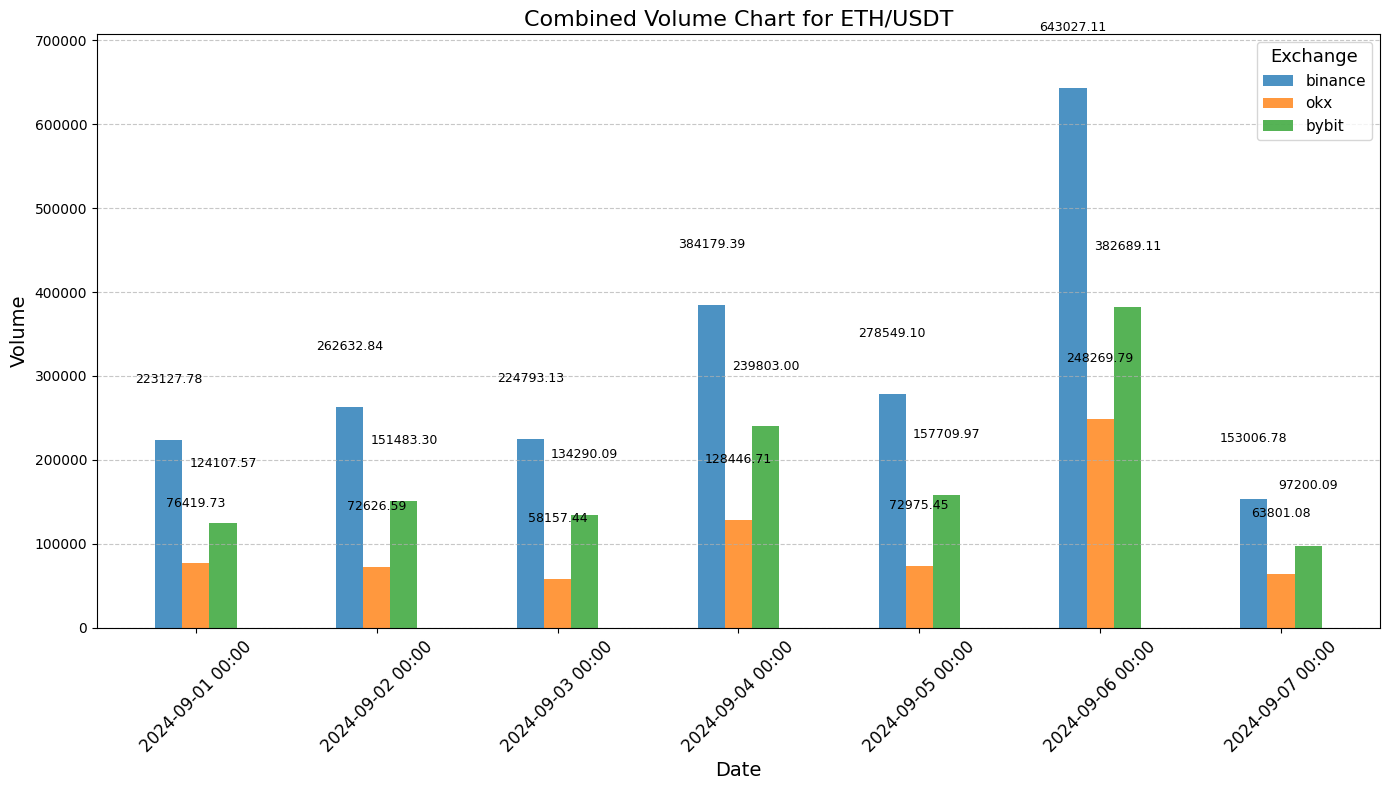

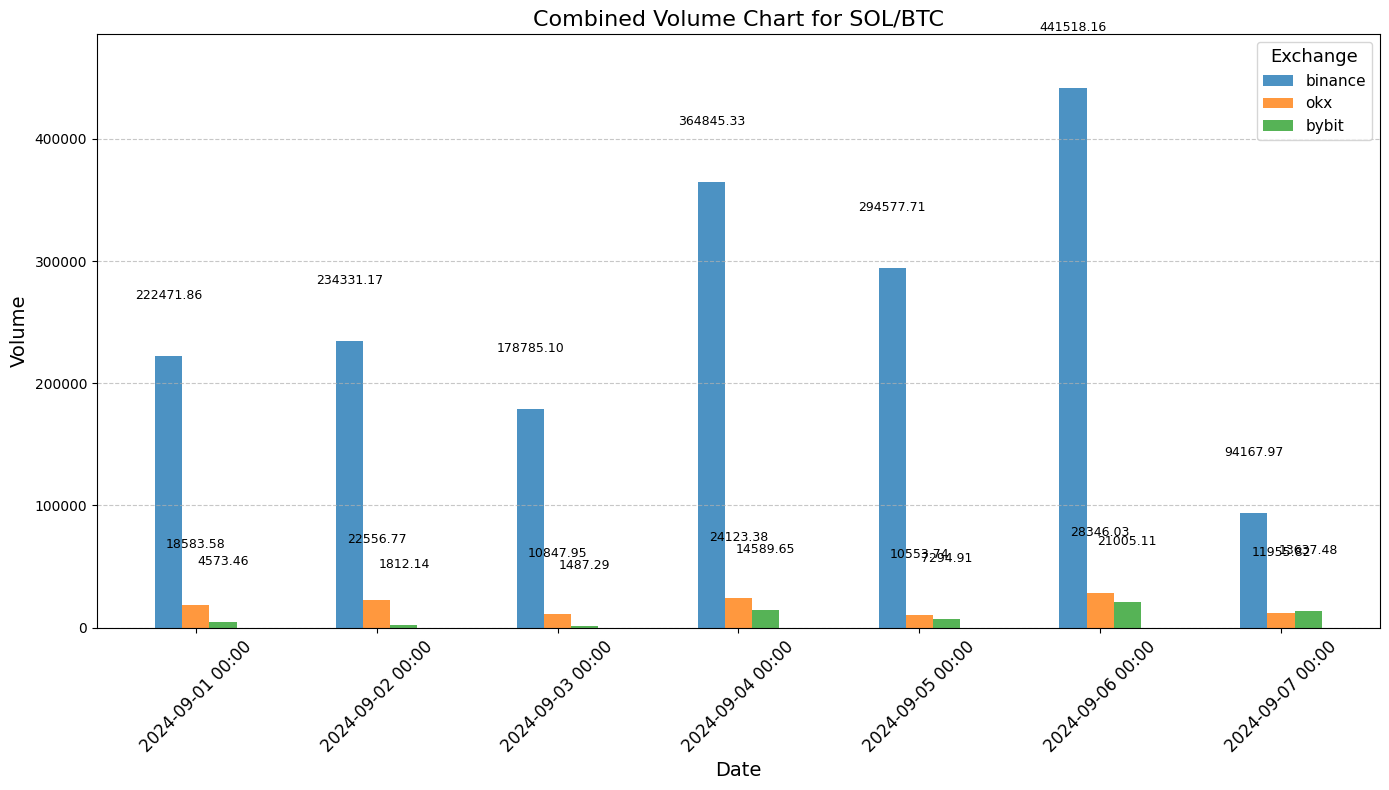

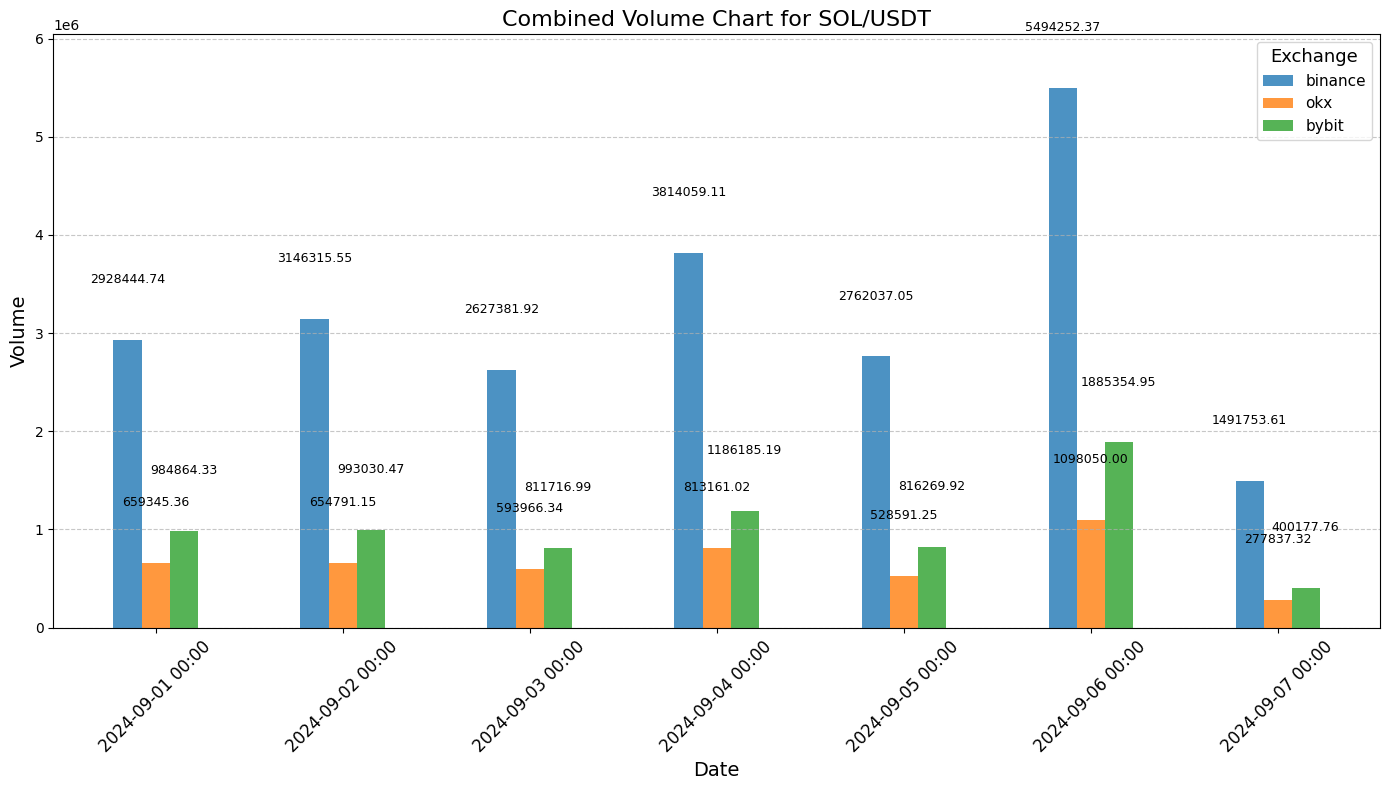

{'error': 'Failed to fetch data from Bybit'}
Failed to fetch data for SOL/ETH from bybit: 500 Server Error: Internal Server Error for url: http://43.207.238.120:9000/marketdata/bybit/cctx/candles?symbol=SOL%2FETH&interval=1d&limit=20&start=1725148800000.0


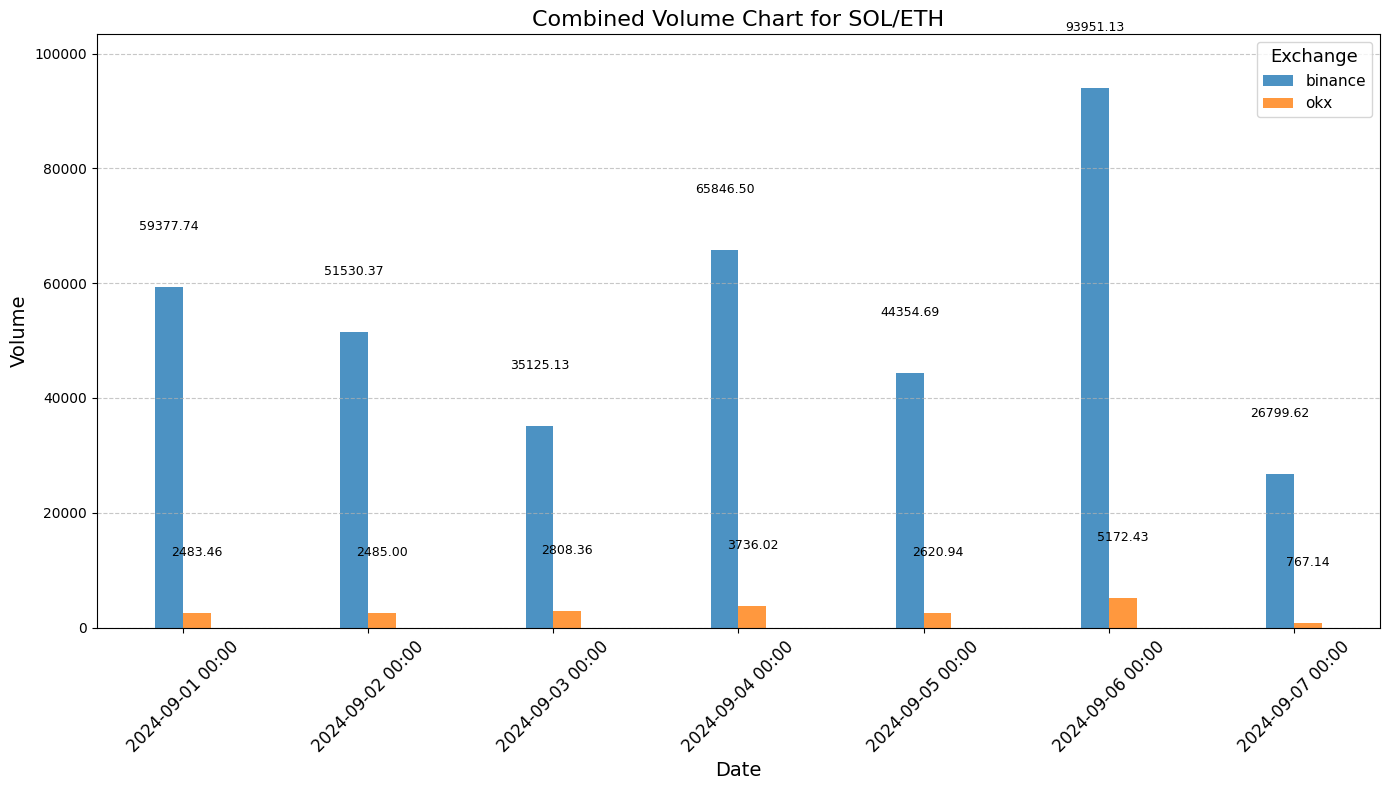

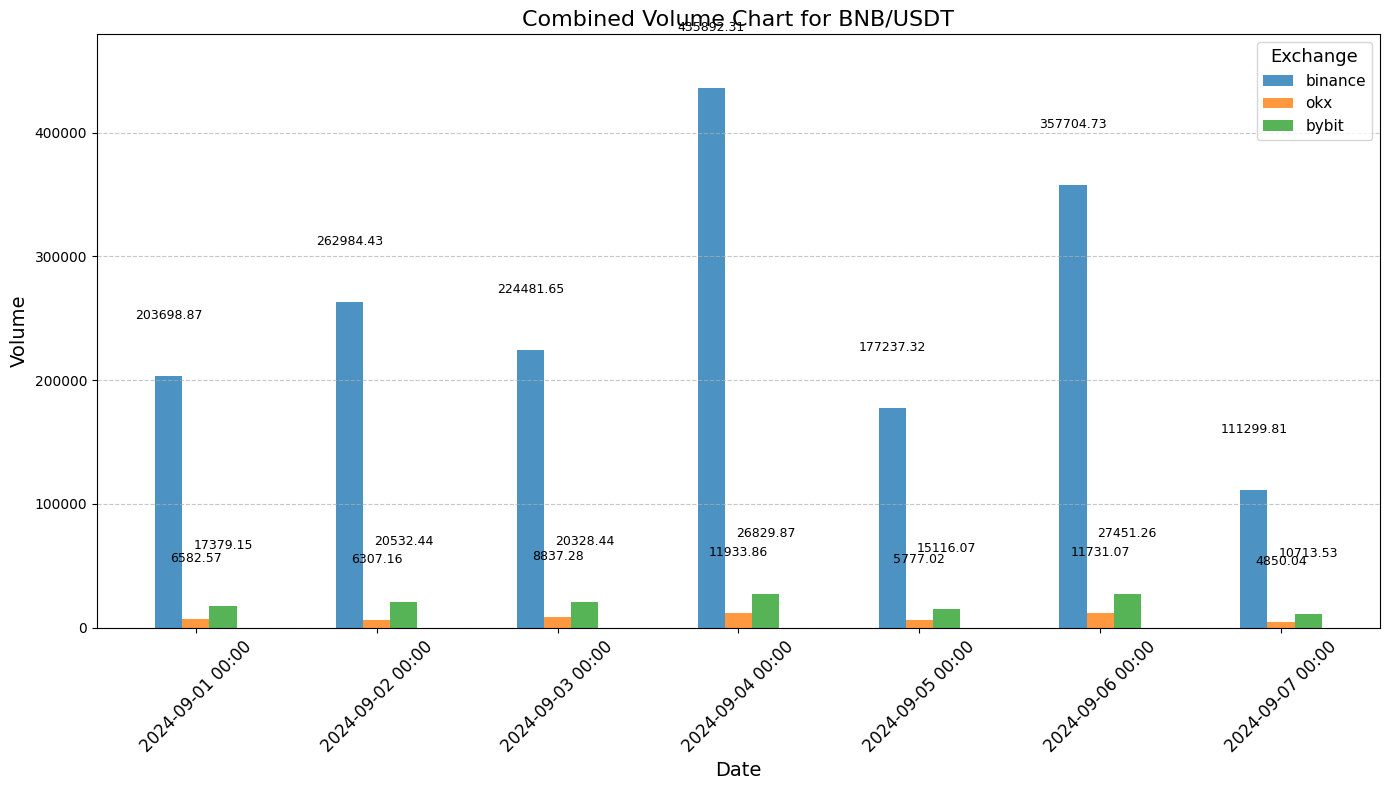

{'error': 'Failed to fetch data from OKX'}
Failed to fetch data for BNB/BTC from okx: 500 Server Error: Internal Server Error for url: http://43.207.238.120:9000/marketdata/okx/cctx/candles?symbol=BNB%2FBTC&interval=1d&limit=20&start=1725148800000.0
{'error': 'Failed to fetch data from Bybit'}
Failed to fetch data for BNB/BTC from bybit: 500 Server Error: Internal Server Error for url: http://43.207.238.120:9000/marketdata/bybit/cctx/candles?symbol=BNB%2FBTC&interval=1d&limit=20&start=1725148800000.0


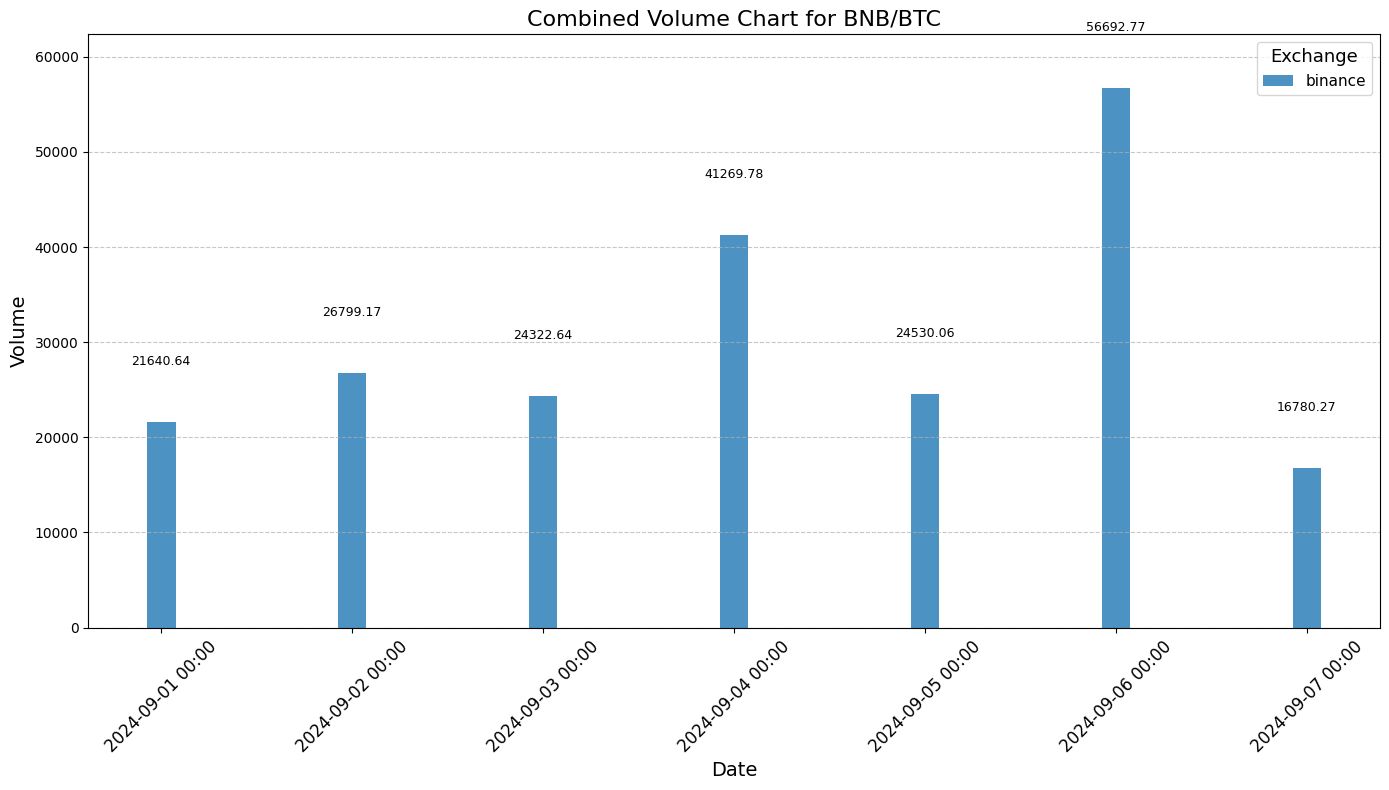

In [3]:
import warnings
import requests
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
symbols = ["BTC/USDT", "ETH/BTC", "ETH/USDT", "SOL/BTC", "SOL/USDT", "SOL/ETH", "BNB/USDT", "BNB/BTC" ] #put symbols
timeframe = "1d" #examples = 5m , 1d , 5h
exchanges = ["binance","okx", "bybit"]#, "coinbase" , 'Htx' , "crytocom" ]
# exchanges = ["binance", "okx", "bybit", "coinbase"]
#numbers of bars
limit = 20
# start Time
start_time = datetime.datetime(2024, 9, 1, 0, 0) #24 hour time format GMT

def fetch_data(exchange, symbol, interval):

    base_url = f"http://43.207.238.120:9000/marketdata/{exchange}/cctx/candles"
    parms = {"symbol": symbol, "interval": interval, "limit": limit ,
             "start" : start_time.timestamp() * 1000 }
    # print(parms)
    response = requests.get(base_url, params=parms)
    # print(f"{exchange} = {response.json()}")
    if response.status_code != 200:
        print(response.json())
    response.raise_for_status()
    return response.json()

def create_dataframe(data):
    columns = ["timestamp", "open", "high", "low", "close", "volume"]
    df = pd.DataFrame(data, columns=columns)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')  # Convert timestamp to datetime
    df.set_index("timestamp", inplace=True)
    return df
def plot_combined_volume(dataframes, symbol):
    num_exchanges = len(dataframes)
    bar_width = 0.15  # Width of each bar
    index = np.arange(len(next(iter(dataframes.values()))))  # Index for x-axis

    plt.figure(figsize=(14, 8))
    bar_positions = [index + i * bar_width for i in range(num_exchanges)]

    max_volume = max(df["volume"].max() for df in dataframes.values())
    margin = max_volume * 0.1

    for i, (exchange, df) in enumerate(dataframes.items()):
        plt.bar(bar_positions[i], df["volume"], width=bar_width, label=exchange, alpha=0.8)
        for j, volume in enumerate(df["volume"]):
            plt.text(bar_positions[i][j], volume + margin, f"{volume:.2f}", ha='center', va='bottom', fontsize=9)

    plt.title(f"Combined Volume Chart for {symbol}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Volume", fontsize=14)

    # Use the index of the DataFrame directly
    first_df = next(iter(dataframes.values()))
    if isinstance(first_df.index, pd.DatetimeIndex):
        # Format dates with hours and minutes
        formatted_dates = first_df.index.strftime('%Y-%m-%d %H:%M')
    else:
        formatted_dates = first_df.index

    plt.xticks(index + (num_exchanges - 1) * bar_width / 2, formatted_dates, rotation=45, fontsize=12)
    plt.ylim(0, max_volume + margin)  # Adjust the y-axis limit to include the margin
    plt.legend(title='Exchange', title_fontsize='13', fontsize='11')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

warnings.filterwarnings("ignore")
# symbols = ["BTC/USDT", "ETH/USDT", "SOL/USDT", "ETH/BTC", "SOL/BTC", "SOL/ETH"]

for symbol in symbols:
    dataframes = {}
#     router.get('/Htx/candles', HtxController.getOkxCandles);


# router.get('/crytocom/candles', CryptoBaseController.getOkxCandles);
    for exchange in exchanges:
        try:
            data = fetch_data(exchange, symbol, timeframe)
            if data:  # Ensure data is not empty
                df = create_dataframe(data)
                dataframes[exchange] = df
        except Exception as e:
            print(f"Failed to fetch data for {symbol} from {exchange}: {e}")

    if dataframes:
        plot_combined_volume(dataframes, symbol)


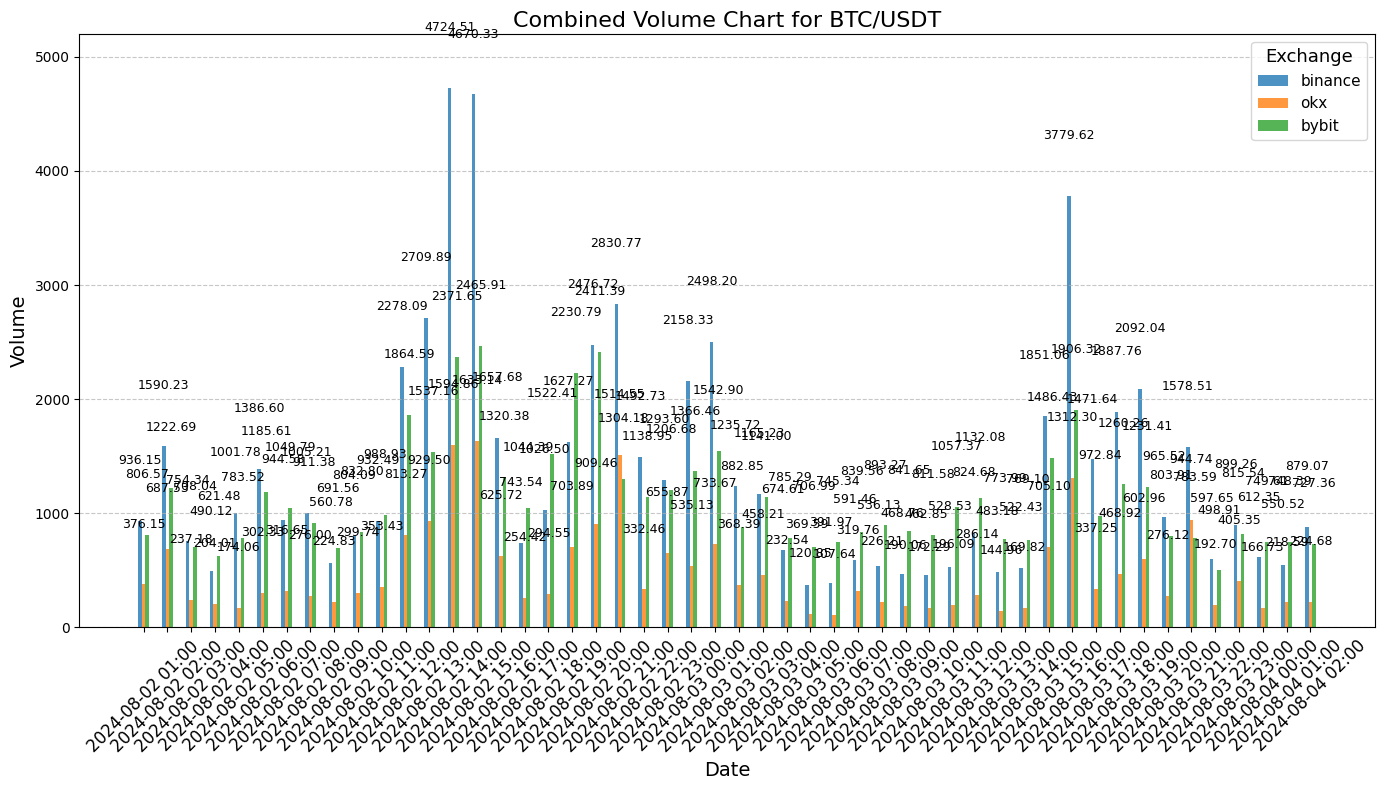

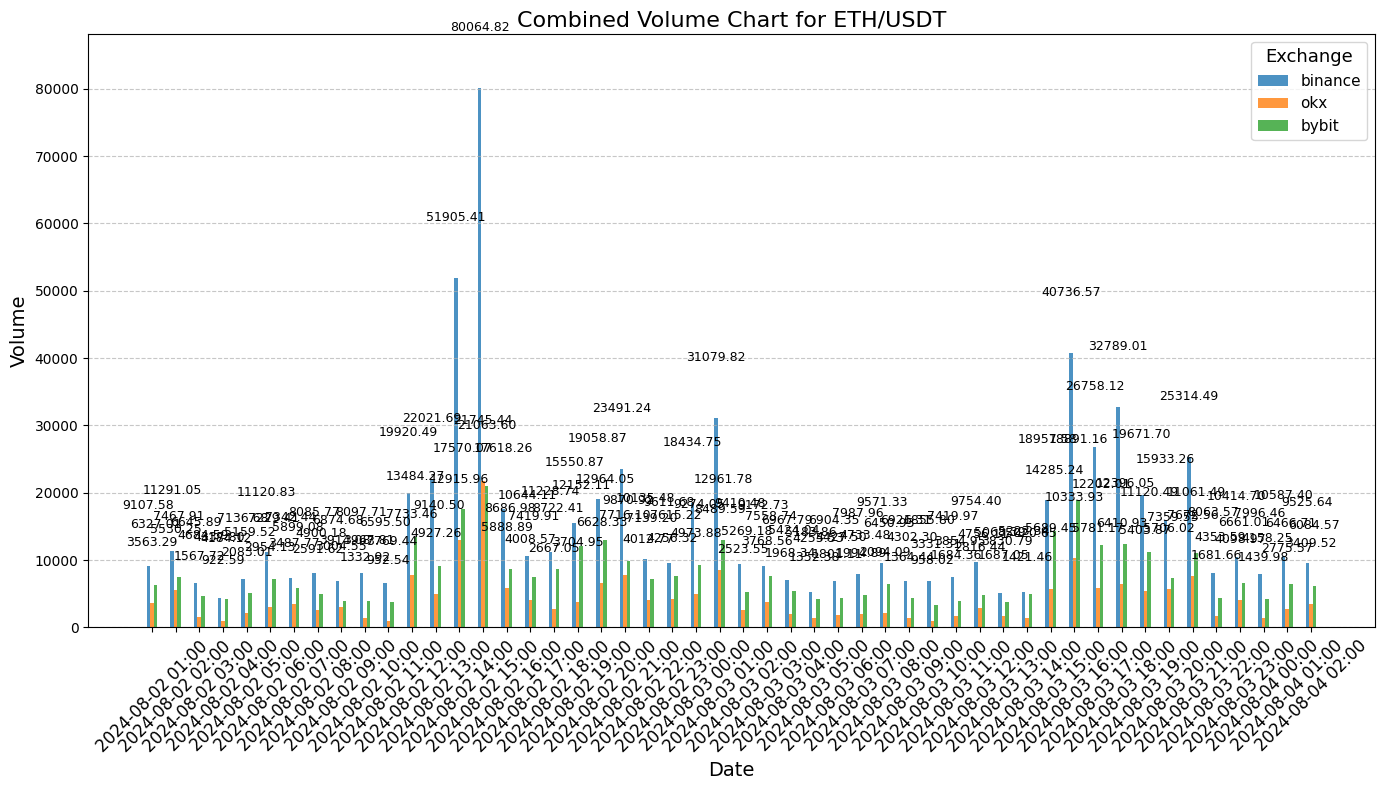

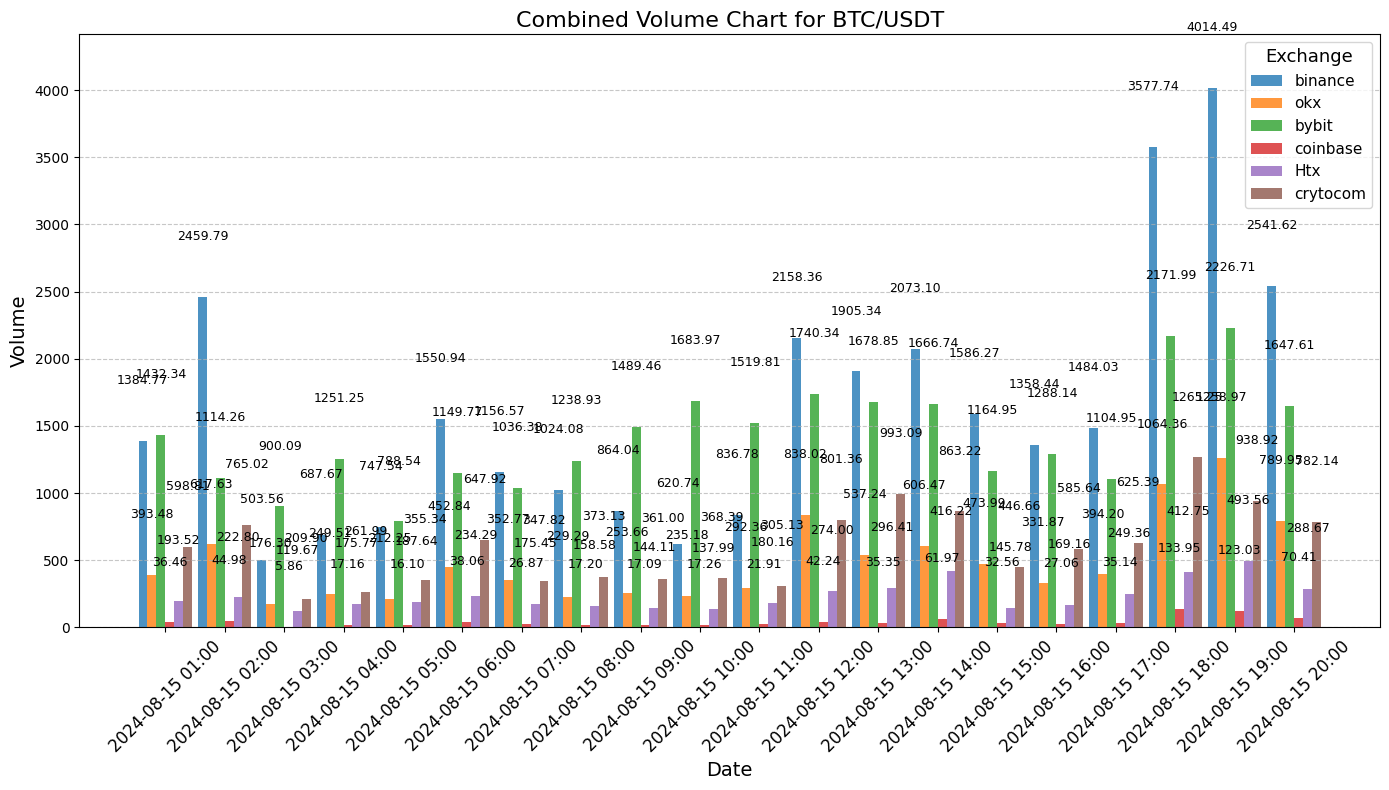

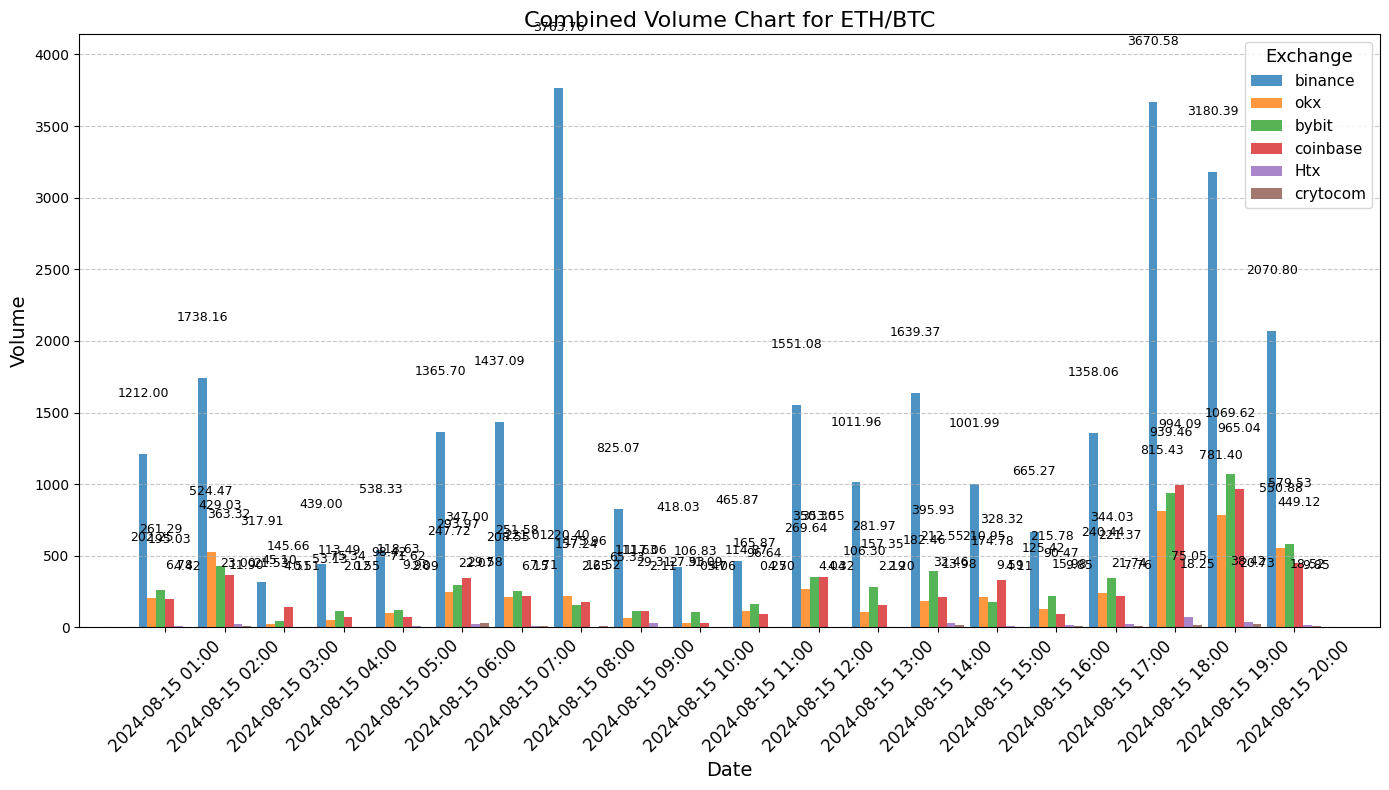

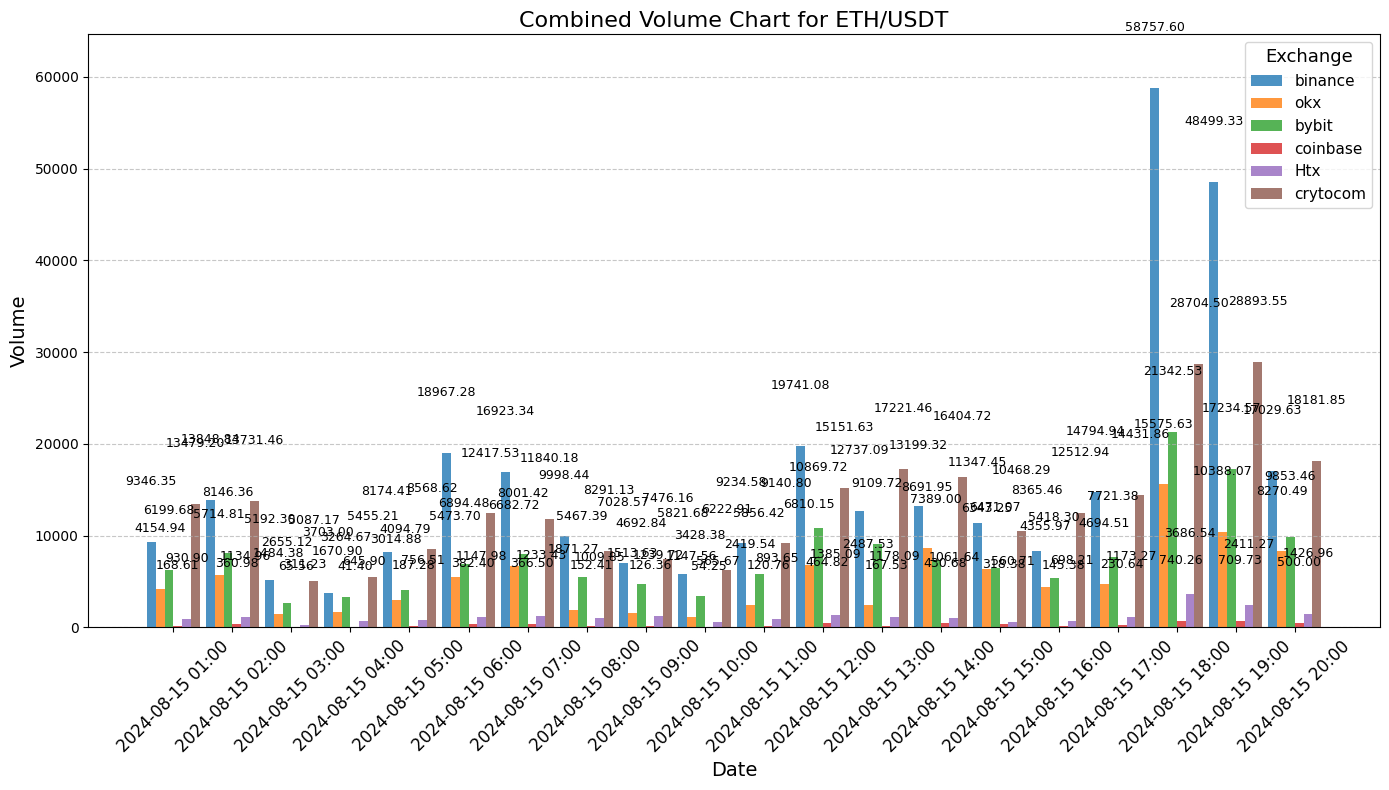

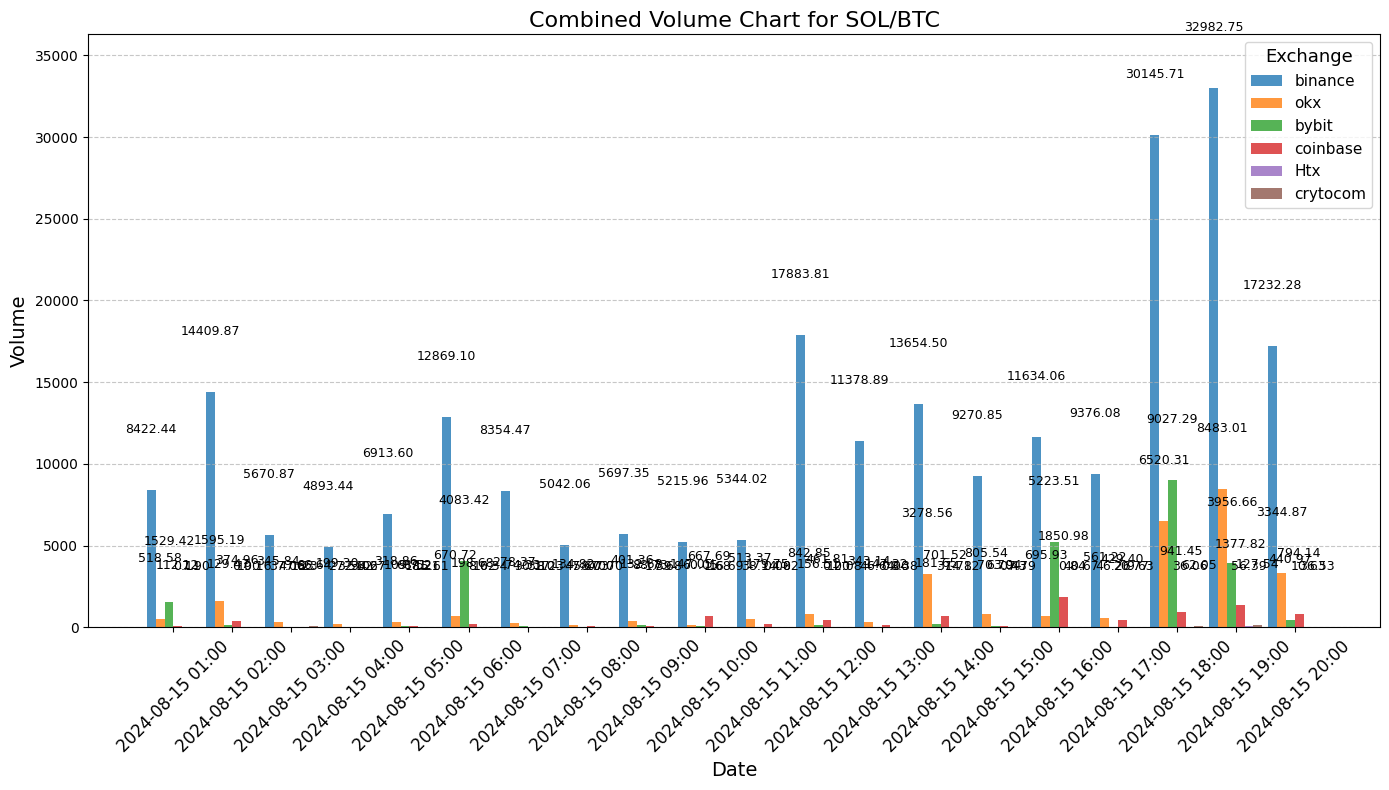

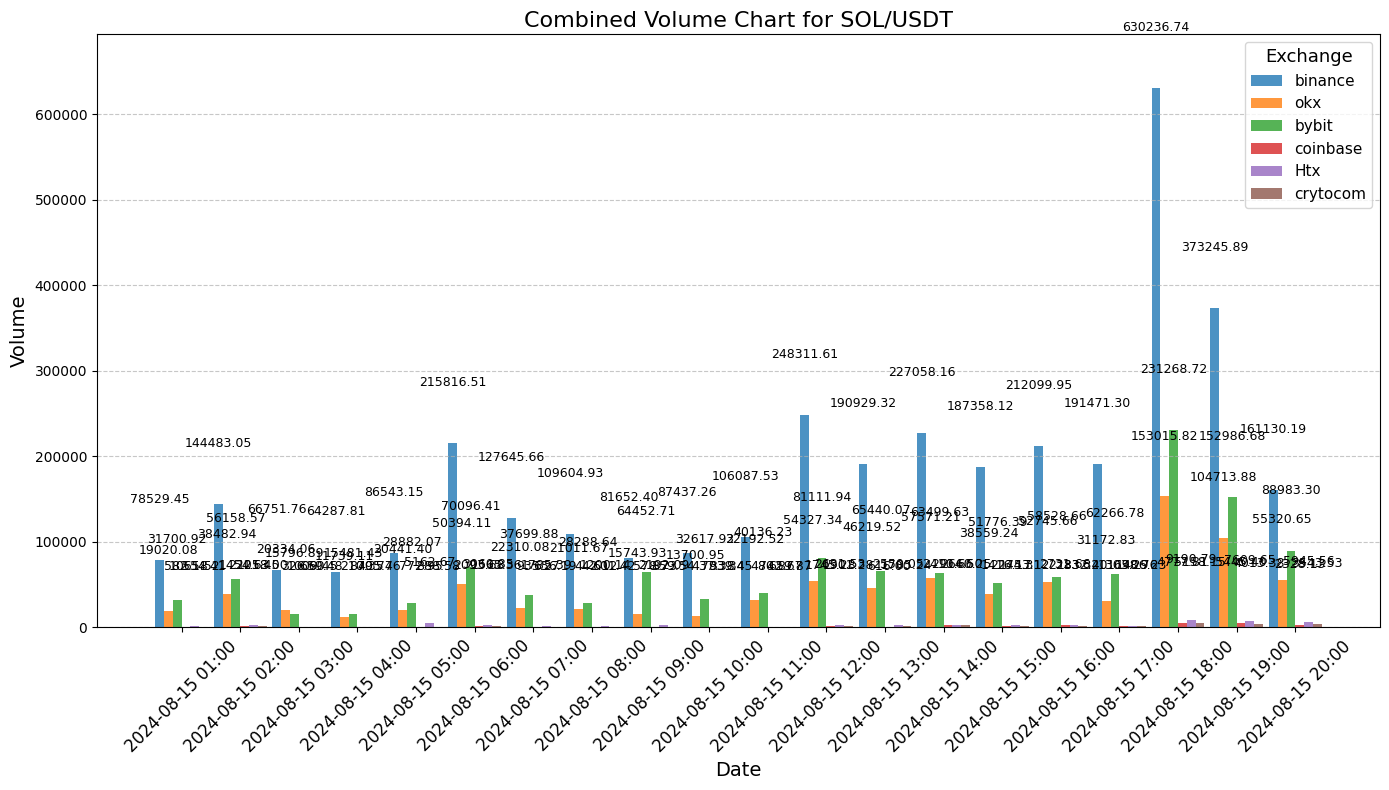

{'error': 'Failed to fetch data from Bybit'}
Failed to fetch data for SOL/ETH from bybit: 500 Server Error: Internal Server Error for url: http://43.207.238.120:9000/marketdata/bybit/cctx/candles?symbol=SOL%2FETH&interval=1h&limit=20&start=1723683600000.0
{'error': 'Failed to fetch data from HTX (Huobi)'}
Failed to fetch data for SOL/ETH from Htx: 500 Server Error: Internal Server Error for url: http://43.207.238.120:9000/marketdata/Htx/cctx/candles?symbol=SOL%2FETH&interval=1h&limit=20&start=1723683600000.0


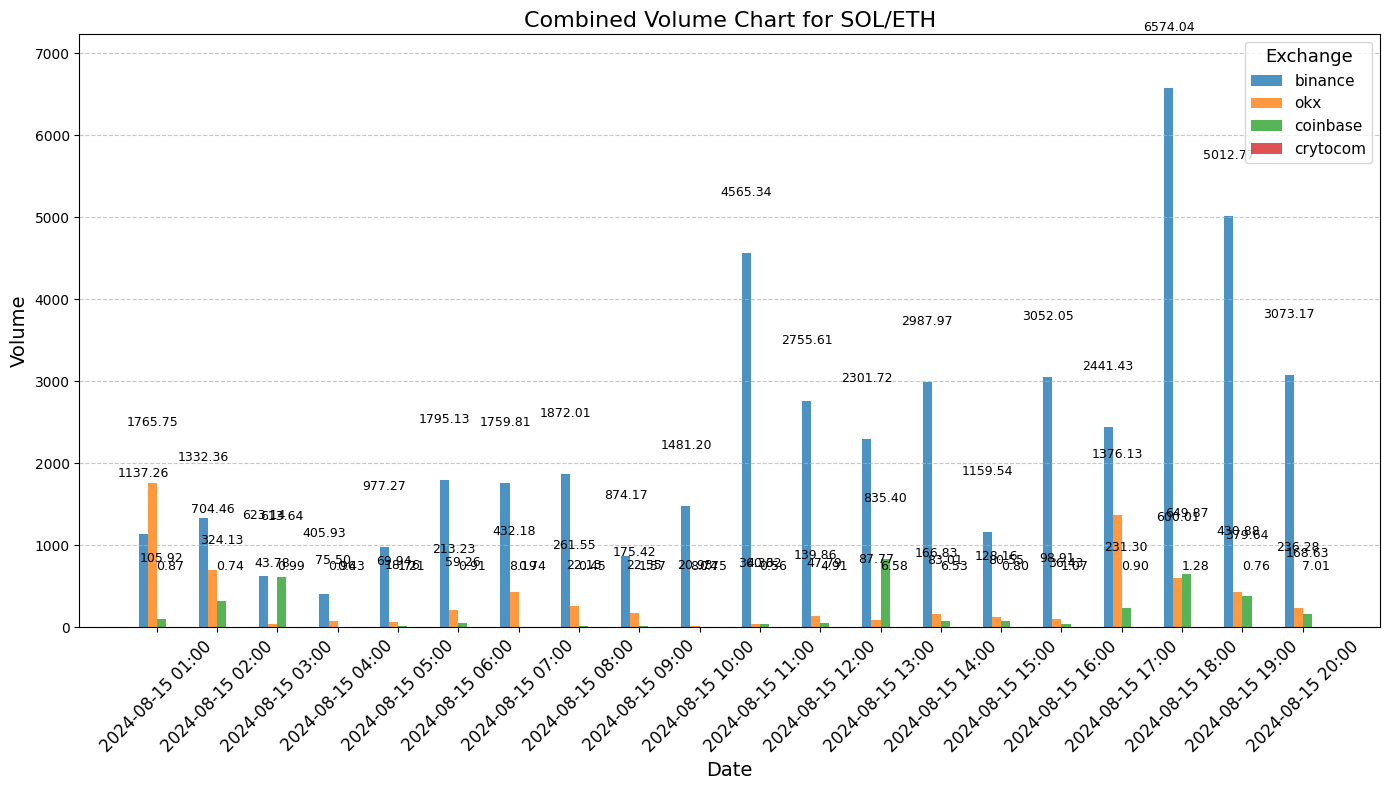

In [ ]:
symbols = ["BTC/USDT", "ETH/BTC", "ETH/USDT", "SOL/BTC", "SOL/USDT", "SOL/ETH"  ] #put symbols
timeframe = "1h" #examples = 5m , 1d , 5h
exchanges = ["binance", "okx", "bybit", "coinbase" , 'Htx' , "crytocom" ]
# exchanges = ["binance", "okx", "bybit", "coinbase"]
#numbers of bars
limit = 20
# start Time
start_time = datetime.datetime(2024, 8, 15, 1, 0) #24 hour time format GMT

def fetch_data(exchange, symbol, interval):

    base_url = f"http://43.207.238.120:9000/marketdata/{exchange}/cctx/candles"
    parms = {"symbol": symbol, "interval": interval, "limit": limit ,
             "start" : start_time.timestamp() * 1000 }
    # print(parms)
    response = requests.get(base_url, params=parms)
    # print(f"{exchange} = {response.json()}")
    if response.status_code != 200:
        print(response.json())
    response.raise_for_status()
    return response.json()

def create_dataframe(data):
    columns = ["timestamp", "open", "high", "low", "close", "volume"]
    df = pd.DataFrame(data, columns=columns)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')  # Convert timestamp to datetime
    df.set_index("timestamp", inplace=True)
    return df
def plot_combined_volume(dataframes, symbol):
    num_exchanges = len(dataframes)
    bar_width = 0.15  # Width of each bar
    index = np.arange(len(next(iter(dataframes.values()))))  # Index for x-axis

    plt.figure(figsize=(14, 8))
    bar_positions = [index + i * bar_width for i in range(num_exchanges)]

    max_volume = max(df["volume"].max() for df in dataframes.values())
    margin = max_volume * 0.1

    for i, (exchange, df) in enumerate(dataframes.items()):
        plt.bar(bar_positions[i], df["volume"], width=bar_width, label=exchange, alpha=0.8)
        for j, volume in enumerate(df["volume"]):
            plt.text(bar_positions[i][j], volume + margin, f"{volume:.2f}", ha='center', va='bottom', fontsize=9)

    plt.title(f"Combined Volume Chart for {symbol}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Volume", fontsize=14)

    # Use the index of the DataFrame directly
    first_df = next(iter(dataframes.values()))
    if isinstance(first_df.index, pd.DatetimeIndex):
        # Format dates with hours and minutes
        formatted_dates = first_df.index.strftime('%Y-%m-%d %H:%M')
    else:
        formatted_dates = first_df.index

    plt.xticks(index + (num_exchanges - 1) * bar_width / 2, formatted_dates, rotation=45, fontsize=12)
    plt.ylim(0, max_volume + margin)  # Adjust the y-axis limit to include the margin
    plt.legend(title='Exchange', title_fontsize='13', fontsize='11')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

warnings.filterwarnings("ignore")
# symbols = ["BTC/USDT", "ETH/USDT", "SOL/USDT", "ETH/BTC", "SOL/BTC", "SOL/ETH"]

for symbol in symbols:
    dataframes = {}
#     router.get('/Htx/candles', HtxController.getOkxCandles);


# router.get('/crytocom/candles', CryptoBaseController.getOkxCandles);
    for exchange in exchanges:
        try:
            data = fetch_data(exchange, symbol, timeframe)
            if data:  # Ensure data is not empty
                df = create_dataframe(data)
                dataframes[exchange] = df
        except Exception as e:
            print(f"Failed to fetch data for {symbol} from {exchange}: {e}")

    if dataframes:
        plot_combined_volume(dataframes, symbol)


2024-08-02 01:00:00


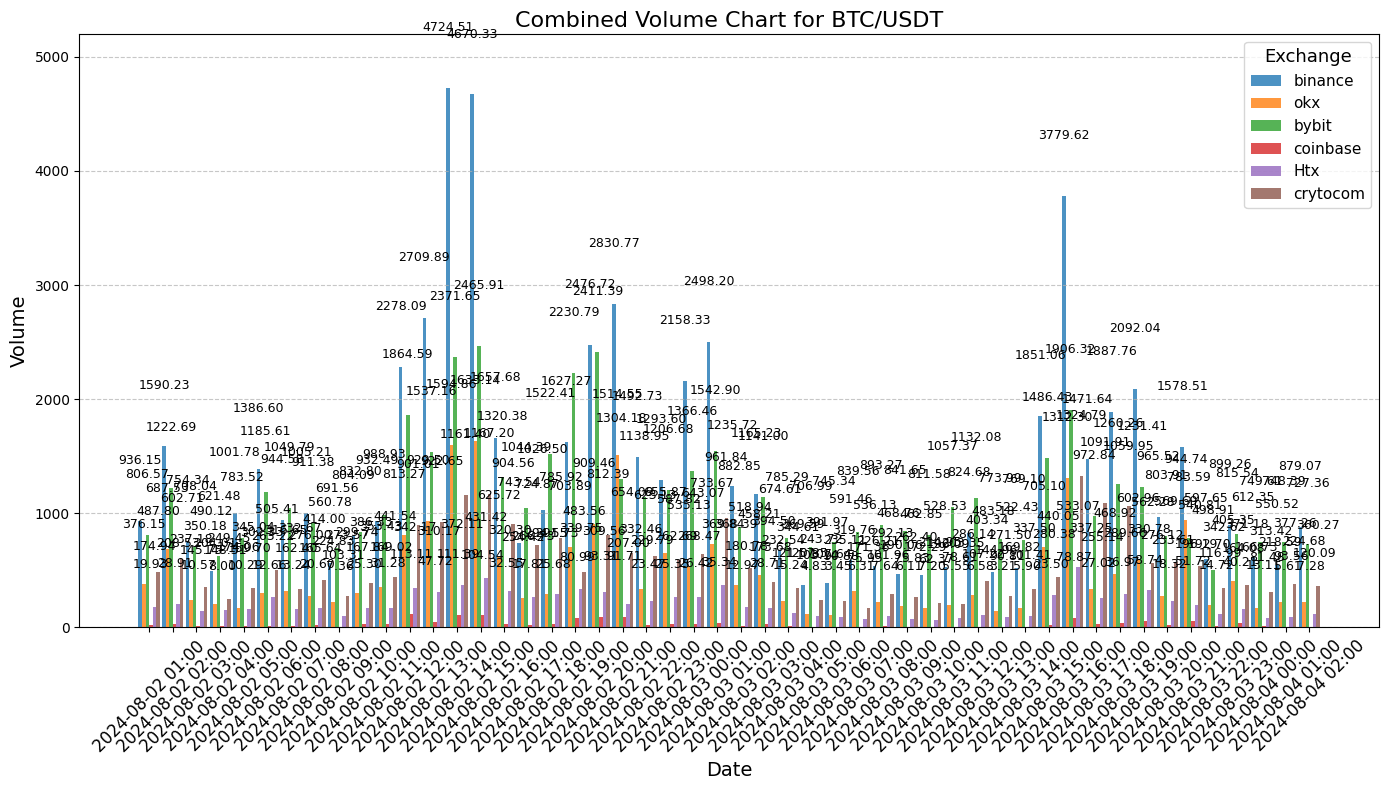